# Import Libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

# Import DataSet

In [2]:
data=pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Feature Engineering

In [8]:
#For sex column-->
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
def dummy(df,column):
    n=pd.get_dummies(df[column],drop_first=True)
    df=pd.concat([df,n],axis=1)
    df.drop(column,axis=1,inplace=True)
    return df

In [10]:
data1=dummy(data,"sex")

In [11]:
data1.rename(columns={'male':"Sex"},inplace=True)

In [12]:
data1.head()

,age,bmi,children,smoker,region,charges,Sex
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [13]:
#for region column-->
data1["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
data2=dummy(data1,"region")

In [15]:
data2.rename(columns={"northwest":"Region_NW","southeast":"Region_SE","southwest":"Region_SW"},inplace=True)

In [16]:
data2.head()

,age,bmi,children,smoker,charges,Sex,Region_NW,Region_SE,Region_SW
0,19,27.900,0,yes,16884.92400,0,0,0,1
1,18,33.770,1,no,1725.55230,1,0,1,0
2,28,33.000,3,no,4449.46200,1,0,1,0
3,33,22.705,0,no,21984.47061,1,1,0,0
4,32,28.880,0,no,3866.85520,1,1,0,0


In [17]:
#Now for smoker features--->
data2["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [18]:
data3=dummy(data2,"smoker")

In [19]:
data3.rename(columns={"yes":"Smoker","age":"Age","bmi":"BMI","children":"Children","charges":"Charges"},inplace=True)

In [20]:
data3.head()

,Age,BMI,Children,Charges,Sex,Region_NW,Region_SE,Region_SW,Smoker
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


In [21]:
#Create a copy of data3 as a final_data
final_data=data3.copy()

In [22]:
final_data.head()

,Age,BMI,Children,Charges,Sex,Region_NW,Region_SE,Region_SW,Smoker
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


In [23]:
final_data.isnull().sum()

Age          0
BMI          0
Children     0
Charges      0
Sex          0
Region_NW    0
Region_SE    0
Region_SW    0
Smoker       0
dtype: int64

In [24]:
#Observation--> there is no missing value in any features so,

In [25]:
#Lets check for correlation 
corr_metrics=final_data.corr()
corr=corr_metrics["Charges"].sort_values(ascending=False)

In [26]:
corr

Charges      1.000000
Smoker       0.787251
Age          0.299008
BMI          0.198341
Region_SE    0.073982
Children     0.067998
Sex          0.057292
Region_NW   -0.039905
Region_SW   -0.043210
Name: Charges, dtype: float64

<AxesSubplot:>

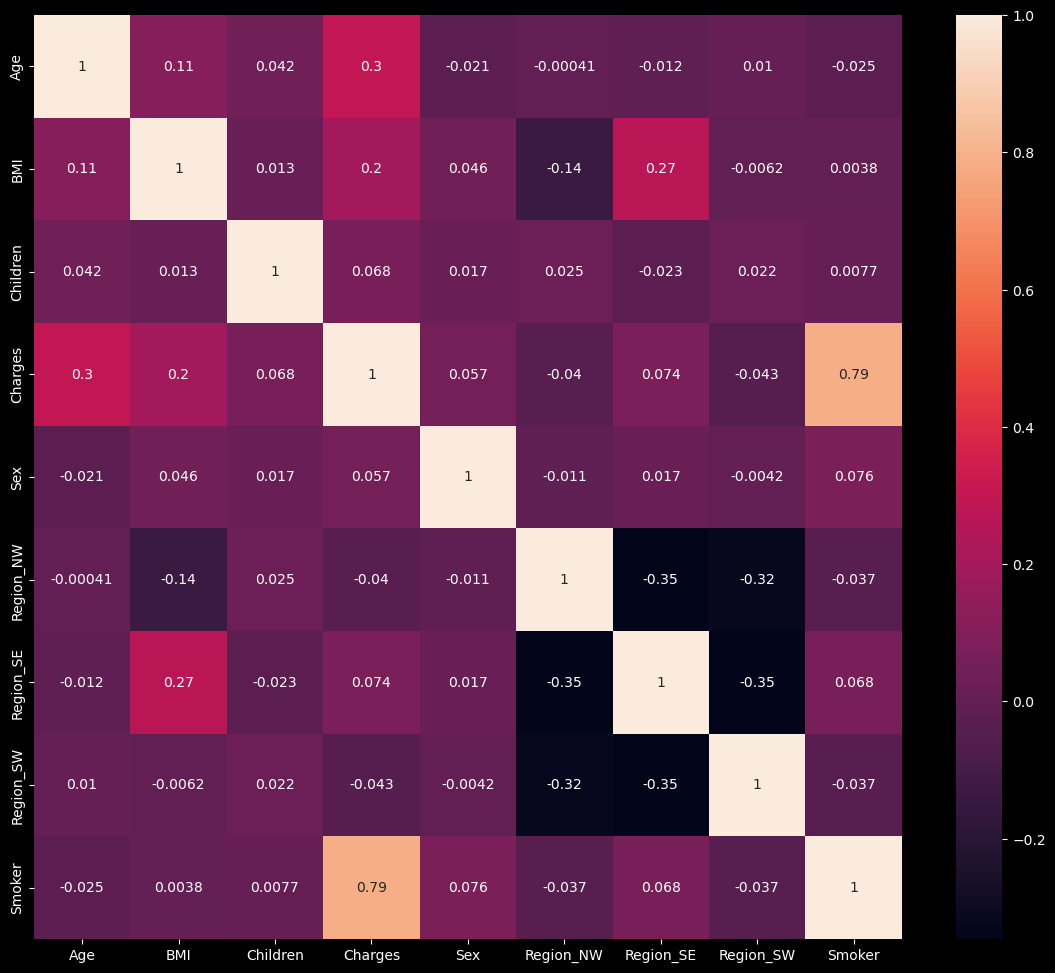

In [27]:
plt.figure(figsize=(14,12))
sns.heatmap(final_data.corr(),annot=True)

In [28]:
#Observation--> Charges have strong correlation with smoker column
#lets try to create a new attributes with the help of smoker column
final_data["Sex_Smoker"]=final_data["Sex"]*final_data["Smoker"]
#final_data["new_attributes2"]=final_data["Sex"]-final_data["Smoker"]
final_data.head()

,Age,BMI,Children,Charges,Sex,Region_NW,Region_SE,Region_SW,Smoker,Sex_Smoker
0,19,27.900,0,16884.92400,0,0,0,1,1,0
1,18,33.770,1,1725.55230,1,0,1,0,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0,0


In [29]:
corr_metric=final_data.corr()
cor=corr_metric["Charges"].sort_values(ascending=False)

In [30]:
cor

Charges       1.000000
Smoker        0.787251
Sex_Smoker    0.599792
Age           0.299008
BMI           0.198341
Region_SE     0.073982
Children      0.067998
Sex           0.057292
Region_NW    -0.039905
Region_SW    -0.043210
Name: Charges, dtype: float64

array([[<AxesSubplot:xlabel='Charges', ylabel='Charges'>,
        <AxesSubplot:xlabel='Sex_Smoker', ylabel='Charges'>],
       [<AxesSubplot:xlabel='Charges', ylabel='Sex_Smoker'>,
        <AxesSubplot:xlabel='Sex_Smoker', ylabel='Sex_Smoker'>]],
      dtype=object)

<Figure size 1400x1200 with 0 Axes>

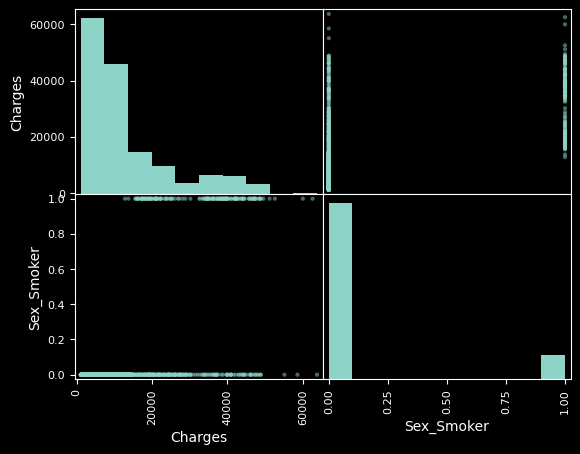

In [31]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(14,12))
scatter_matrix(final_data[["Charges","Sex_Smoker"]])

In [32]:
#First split the data into labels and features
#In this dataset Charges column is labels 
#except Charges all are features column
x=final_data.drop("Charges",axis=1)
y=final_data["Charges"]

In [33]:
x.head()

,Age,BMI,Children,Sex,Region_NW,Region_SE,Region_SW,Smoker,Sex_Smoker
0,19,27.900,0,0,0,0,1,1,0
1,18,33.770,1,1,0,1,0,0,0
2,28,33.000,3,1,0,1,0,0,0
3,33,22.705,0,1,1,0,0,0,0
4,32,28.880,0,1,1,0,0,0,0


In [34]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: Charges, dtype: float64

In [35]:
#Let's import train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
x_train.shape

(1070, 9)

In [37]:
x_test.shape

(268, 9)

In [38]:
y_train.shape

(1070,)

In [39]:
y_test.shape

(268,)

In [40]:
#lets apply standarscaler to train features for make it between 0-1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [41]:
#from sklearn.linear_model import LinearRegression
#model=LinearRegression()
#from sklearn.linear_model import Lasso
#model=Lasso()
#from sklearn.linear_model import Ridge
#model=Ridge()
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [42]:
prediction_test=model.predict(x_test)

In [43]:
prediction_test.shape

(268,)

In [44]:
y_test.shape

(268,)

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [46]:
#print("Accuracy of this model is: ",accuracy_score(y_test,prediction_test)*100)
print("Mean squared error of the model is: ",mean_squared_error(y_test,prediction_test))
print("Mean absolute error of the model is: ",mean_absolute_error(y_test,prediction_test))
print("Squared root of the model is: ",np.sqrt(mean_squared_error(y_test,prediction_test)))

Mean squared error of the model is:  21426775.008757386
Mean absolute error of the model is:  2614.575772672265
Squared root of the model is:  4628.906459279274


In [47]:
#Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction_test})
df

,Actual,Predicted
764,9095.06825,10551.534719
887,5272.17580,5381.158910
890,29330.98315,28363.631017
1293,9301.89355,10653.731740
259,33750.29180,34647.083317
...,...,...
109,47055.53210,47586.335401
575,12222.89830,12718.975625
535,6067.12675,6025.428340
543,63770.42801,46803.638655
